In [3]:
import imageio.v3 as iio
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
from cellSAM import cellsam_pipeline
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
import sys
sys.path.append(r"C:\Users\Leina School\Desktop\Work Exp BDI\BDI-Nuclei_Segmentation\pipeline")

image = np.array(Image.open(r"C:\Users\Leina School\Desktop\Work Exp BDI\data\GTEX-113JC-2226.jpg")) 


In [4]:
from img_manipulation import format_img, tile_img, format_background
from find_means import find_means
from run_cellSAM import run_cellSAM


ImportError: cannot import name 'tile_img' from 'img_manipulation' (C:\Users\Leina School\Desktop\Work Exp BDI\BDI-Nuclei_Segmentation\pipeline\img_manipulation.py)

In [1]:
from pipeline.img_manipulation import format_img, tile_img

ModuleNotFoundError: No module named 'pipeline'

In [ ]:
#self tiler
#crop image so exact tiles made
orig_width, orig_height = 55775, 40504
targ_width, targ_height = 55750, 40500

cropped_image = image[:targ_height, :targ_width]
cropped_pil_image = Image.fromarray(cropped_image)
#cropped_pil_image.save('cropped_image.jpg')

In [248]:
image = np.array(cropped_pil_image)
print(image.shape)

(40500, 55750, 3)


In [249]:

tile_size = 250

h_tile_num = image.shape[0]//tile_size
w_tile_num = image.shape[1]//tile_size

tiles = []

for y in range(h_tile_num):
    for x in range(w_tile_num):
        #start:stop(not inclusive)
        tile = image[y*tile_size:(y+1)*tile_size, x*tile_size:(x+1)*tile_size, :]
        tiles.append(tile)
            
#print(tiles)

[np.float64(245.988544), np.float64(245.998976), np.float64(245.924544), np.float64(245.85672), np.float64(245.934128), np.float64(245.935584), np.float64(245.979632), np.float64(245.987712), np.float64(245.987456), np.float64(245.934784), np.float64(246.0), np.float64(245.95072), np.float64(245.997952), np.float64(245.967232), np.float64(245.995392), np.float64(245.866544), np.float64(245.87712), np.float64(245.995904), np.float64(245.997952), np.float64(245.992832), np.float64(246.0), np.float64(245.996928), np.float64(245.972352), np.float64(245.83368), np.float64(245.85208), np.float64(245.998208), np.float64(245.998976), np.float64(245.881344), np.float64(245.997952), np.float64(245.936944), np.float64(245.92656), np.float64(245.986432), np.float64(245.897056), np.float64(245.967248), np.float64(245.897728), np.float64(245.986944), np.float64(245.906112), np.float64(245.993344), np.float64(245.98464), np.float64(245.811344), np.float64(245.805008), np.float64(245.996928), np.float

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        9.000e+00, 4.000e+00, 4.000e+00, 5.000e+00, 8.000e+00, 1.200e+01,
        6.000e+00, 1.100e+01, 1.500e+01, 7.000e+00, 1.500e+01, 7.000e+00,
        1.800e+01, 2.200e+01, 1.400e+01, 1.400e+01, 2.000e+01, 1.600e+01,
        1.400e+01, 4.600e+01, 3.600e+01, 5.200e+01, 3.200e+01, 3.100e+01,
        4.300e+01, 4.700e+01, 5.500e+01, 6.500e+01, 6.500e+01, 9.500e+01,
        7.800e+01, 8.500e+01, 8.700e+01, 1.190e+02, 9.800e+01, 1.110e+02,
        1.360e+02, 1.200e+02, 1.410e+02, 1.820e+02, 2.140e+02, 1.910e+02,
        2.110e+02, 2.250e+02, 2.520e+02, 2.640e+02, 2.240e+02, 2.760e+02,
        2.680e+02, 2.770e+02, 2.830e+02, 3.150e+02, 3.300e+02, 2.940e+02,
        3.140e+02, 3.180e+02, 3.120e+0

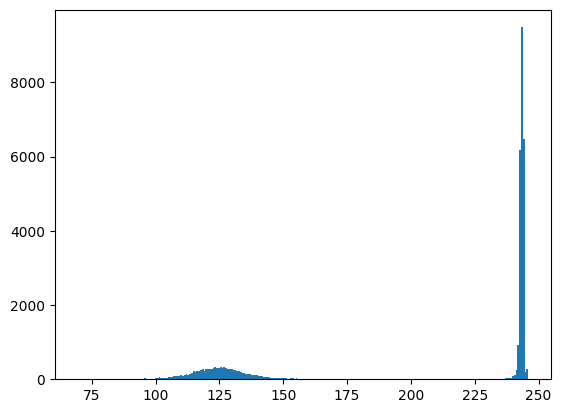

In [251]:
#histogram
means = []

#find averages of each tile pixel values in greyscale
for tile in tiles:
    img_section = Image.fromarray(tile)
    grey_img = img_section.convert("L")
    grey_tile = np.array(grey_img)
    means.append(grey_tile.mean()) 

print(means)
plt.hist(means, bins = 250)

In [ ]:
#seperate tile types
background_tile = []
tissue_tile = []

#for every tile, check avg, if surpasses threshhold then store index in array
for tile in range(len(means)):
   print(means[tile])
   if means[tile] < 225:
      tissue_tile.append(tile)
   else:
      background_tile.append(tile)

Total blocks: 1


1it [00:18, 18.67s/it]


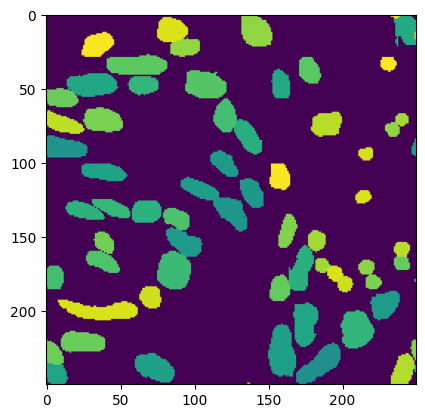

In [266]:
image = tiles[tissue_tile[967]]

 #Run inference pipeline
mask = cellsam_pipeline(
    image, use_wsi=True, low_contrast_enhancement=False, gauge_cell_size=False
)

# Visualize results
plt.imshow(mask)

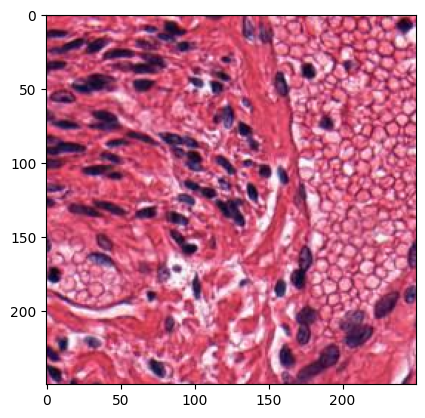

In [267]:
plt.imshow(image)

In [ ]:
#iterate through tissue_tiles and create a tiles equivalent array of masks

masks = []

for tile in tqdm(tissue_tile):
    mask = cellsam_pipeline(tiles[tile], use_wsi=True, low_contrast_enhancement=False, gauge_cell_size=False)
    mask = mask.tolist()
    masks.append(mask)

In [ ]:
# Use several iterations to make the mask edge visible when plotting
dilated_mask = sp.ndimage.binary_dilation(pred_mask > 0, iterations=5)
edges = (dilated_mask > pred_mask).astype(np.uint8)

# Plot the image
plt.imshow(red_test_tile, cmap="gray")

# And the outlines from the mask
plt.imshow(255 * edges, cmap="Reds", alpha=edges)

In [ ]:
print(edges)